<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

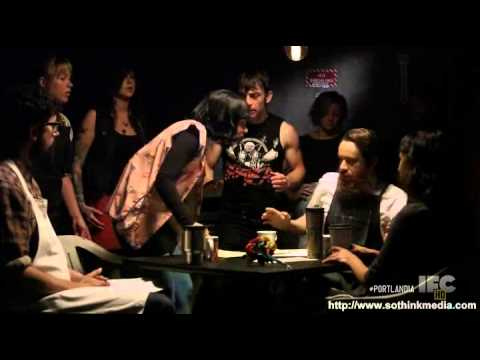

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\test.NIDHNEMI\\lambda\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
# Start here

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [11]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [12]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [15]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [16]:
shops['tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

In [18]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [19]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens_spacy'] = tokens

In [20]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,tokens_spacy
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,...","[ , 11/25/2016, 1, check-in, Love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb...","[ , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo...","[ , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni...","[ , 11/25/2016, Very, cool, decor!, Good, drin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with...","[ , 12/3/2016, 1, check-in, They, are, located..."


In [44]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [46]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,the,6847,34809,1.0,0.044537,0.044537,0.899028
69,and,6864,26650,2.0,0.034098,0.078634,0.901261
9,a,6246,22755,3.0,0.029114,0.107748,0.820116
23,i,5528,20237,4.0,0.025892,0.133641,0.725840
53,to,5653,17164,5.0,0.021961,0.155601,0.742253


In [47]:
wc_spacy = count(shops['tokens_spacy'])
wc_spacy.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
33,the,6520,27779,1.0,0.034334,0.034334,0.856092
32,and,6804,25748,2.0,0.031824,0.066157,0.893382
67,,7616,22606,3.0,0.027940,0.094097,1.000000
24,a,6181,22085,4.0,0.027296,0.121394,0.811581
3,I,5469,19780,5.0,0.024447,0.145841,0.718093


In [32]:
shops['rating'] = shops['star_rating'].str.replace(' star rating','')

In [37]:
shops['rating'] = shops['rating'].astype(int)

In [38]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,tokens_spacy,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,...","[ , 11/25/2016, 1, check-in, Love, love, loved...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb...","[ , 12/2/2016, Listed, in, Date, Night:, Austi...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo...","[ , 11/30/2016, 1, check-in, Listed, in, Brunc...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni...","[ , 11/25/2016, Very, cool, decor!, Good, drin...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with...","[ , 12/3/2016, 1, check-in, They, are, located...",4


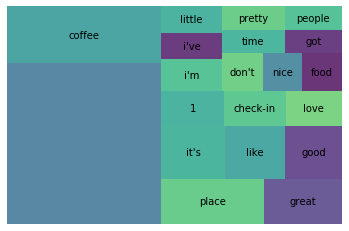

In [76]:
## Display of tokens using spacy's tokenizer

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


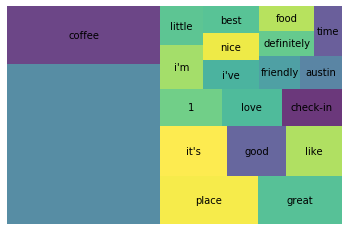

In [77]:
## Display of tokens for restaurants with rating > 3 (good ones) 

good_shops = shops.loc[shops['rating'] >3 ]

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(good_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

good_shops['tokens'] = tokens

good_wc = count(good_shops['tokens'])

good_wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


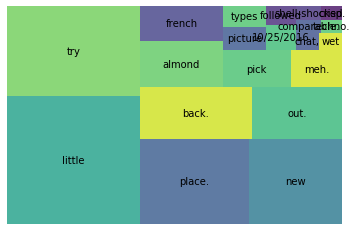

In [78]:
## Display of tokens for restaurants with rating <= 3 (not so good ones) 

not_good_shops = shops.loc[shops['rating'] <= 3 ]

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(not_good_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

not_good_shops['tokens'] = tokens

not_good_wc = count(not_good_shops['tokens'])

not_good_wc_top20 = not_good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=not_good_wc_top20['pct_total'], label=not_good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [92]:
## Extending STOP words

STOP_WORDS = nlp.Defaults.stop_words.union(["I'm", "it's", "I've" 'it.', 'the', 'this', '1', '-', ' ', 'it!', "i've", "i'm"])

C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


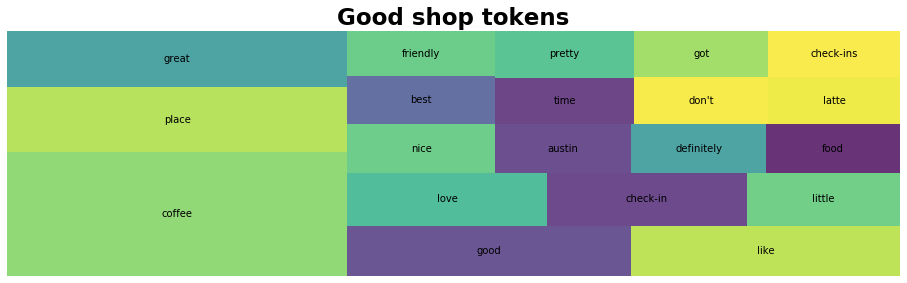

In [93]:
# Display of tokens for good shops after adding more STOP WORDS

tokens = []

for doc in tokenizer.pipe(good_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
good_shops['tokens'] = tokens
                                     
good_wc = count(good_shops['tokens'])

good_wc_top20 = good_wc[good_wc['rank'] <= 20]

fig = plt.gcf()
fig.set_size_inches(16, 4.5)
plt.title("Good shop tokens",fontsize=23,fontweight="bold")

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


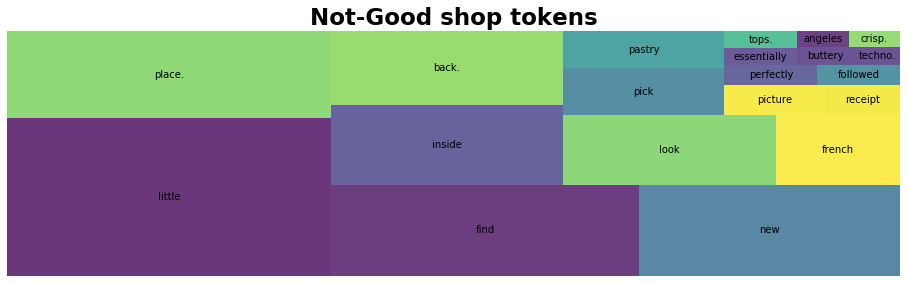

In [94]:
# Display of tokens for not good shops after adding more STOP WORDS

tokens = []

for doc in tokenizer.pipe(not_good_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
not_good_shops['tokens'] = tokens
                                     
not_good_wc = count(not_good_shops['tokens'])

not_good_wc_top20 = not_good_wc[good_wc['rank'] <= 20]

fig = plt.gcf()
fig.set_size_inches(16, 4.5)
plt.title("Not-Good shop tokens",fontsize=23,fontweight="bold")

squarify.plot(sizes=not_good_wc_top20['pct_total'], label=not_good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

